In [294]:
import sys
sys.path.append('../')

In [295]:
import game.agent as ag
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [296]:
plt.rcParams.update({'font.size': 30})

## Description

Simple example for the behavioral profile decision maker with constant labels

In [297]:
seed = None
n_steps = 12

L = torch.as_tensor([
    [0.3],
    [0.7]
], dtype=torch.float)

def get_linear_decision_maker(a: torch.Tensor, inverse:bool = False):
    """
    Gets a BehavioralDecisionMaker that has a linear relation with the memory matrix

    :param torch.Tensor a: matrix A that characterizes the behavior profile
    :param bool inverse: if true, it multiplies A by (1-M) instead of M (first row will still be 1)
    """
    if not inverse:
        return ag.BehavioralDecisionMaker(
            weight_funcs=[
                lambda m,s: (a*m).sum()
            ],
            memory_steps=a.shape[0]-1,
            seed=None,
            deterministic=True,
        )
    else:
        t = torch.zeros(a.shape[0], 1)
        t[0]=1
        return ag.BehavioralDecisionMaker(
            weight_funcs=[
                lambda m,s: (a*(s-m+t)).sum()
            ],
            memory_steps=a.shape[0]-1,
            seed=None,
            deterministic=True,
        )

In [298]:
path = "../examples/profile_examples"

def plot_w(w):
    fig = plt.figure(figsize=(15,15))
    plt.plot(w, linewidth=5)
    plt.ylabel("Weight (w)")
    plt.xlabel("Iteration")
    plt.grid()
    plt.tight_layout()
    return fig


def plot_p(p):
    fig = plt.figure(figsize=(15,15))
    plt.plot(p, linewidth=5)
    plt.ylabel("Probability of safe action")
    plt.xlabel("Iteration")
    plt.grid()
    plt.tight_layout()
    return fig


def plot(w,p, name):
    plot_w(w)
    plt.savefig(f"{path}/{name}_w.png", format='png', dpi=400)
    plot_p(p)
    plt.savefig(f"{path}/{name}_p.png", format='png', dpi=400)


def run(dc, n_steps, name):
    w = []
    p = []
    for _ in range(n_steps):
        dc.decide(L)
        w.append(dc.w.item())
        p.append(dc.p[1])
    
    plot(w,p, name)
    return w,p

## Random

In [299]:
dc_rand = get_linear_decision_maker(torch.as_tensor([
    [0]
], dtype=torch.float))

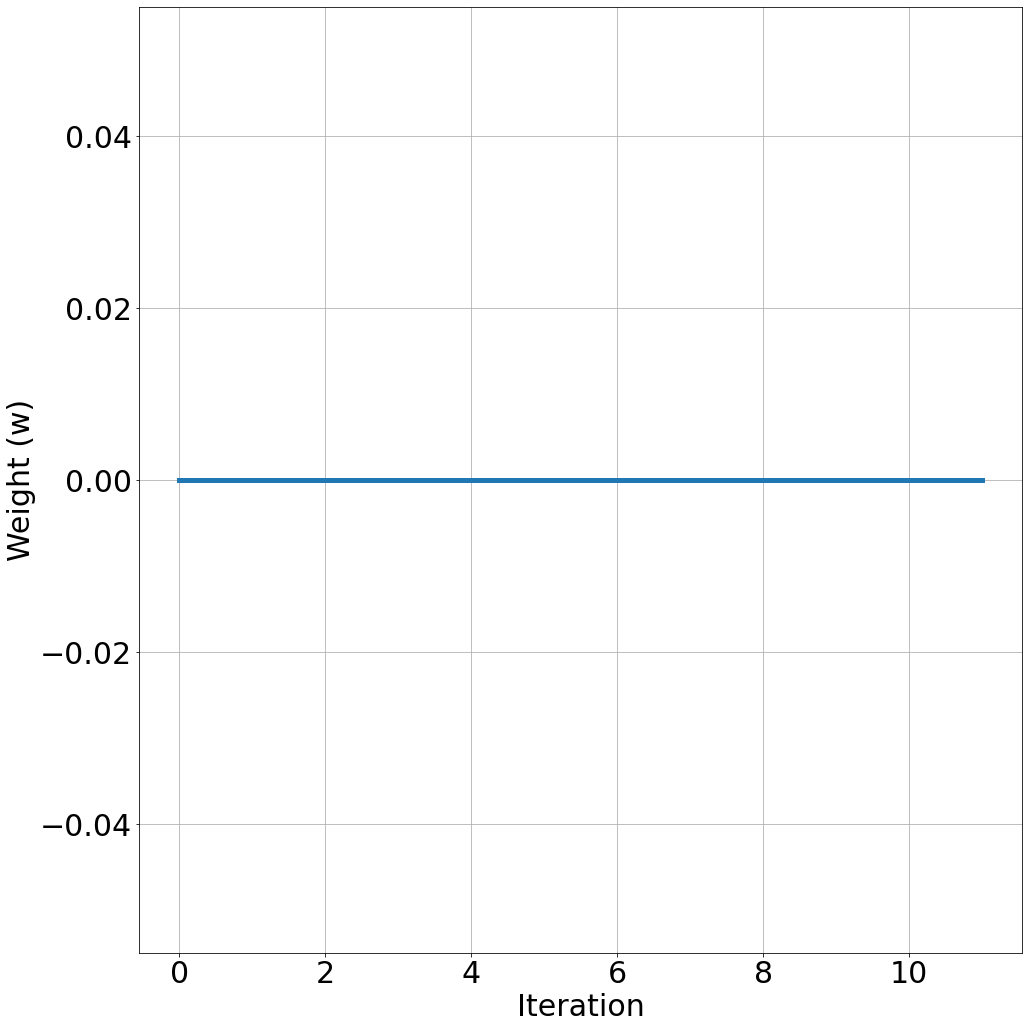

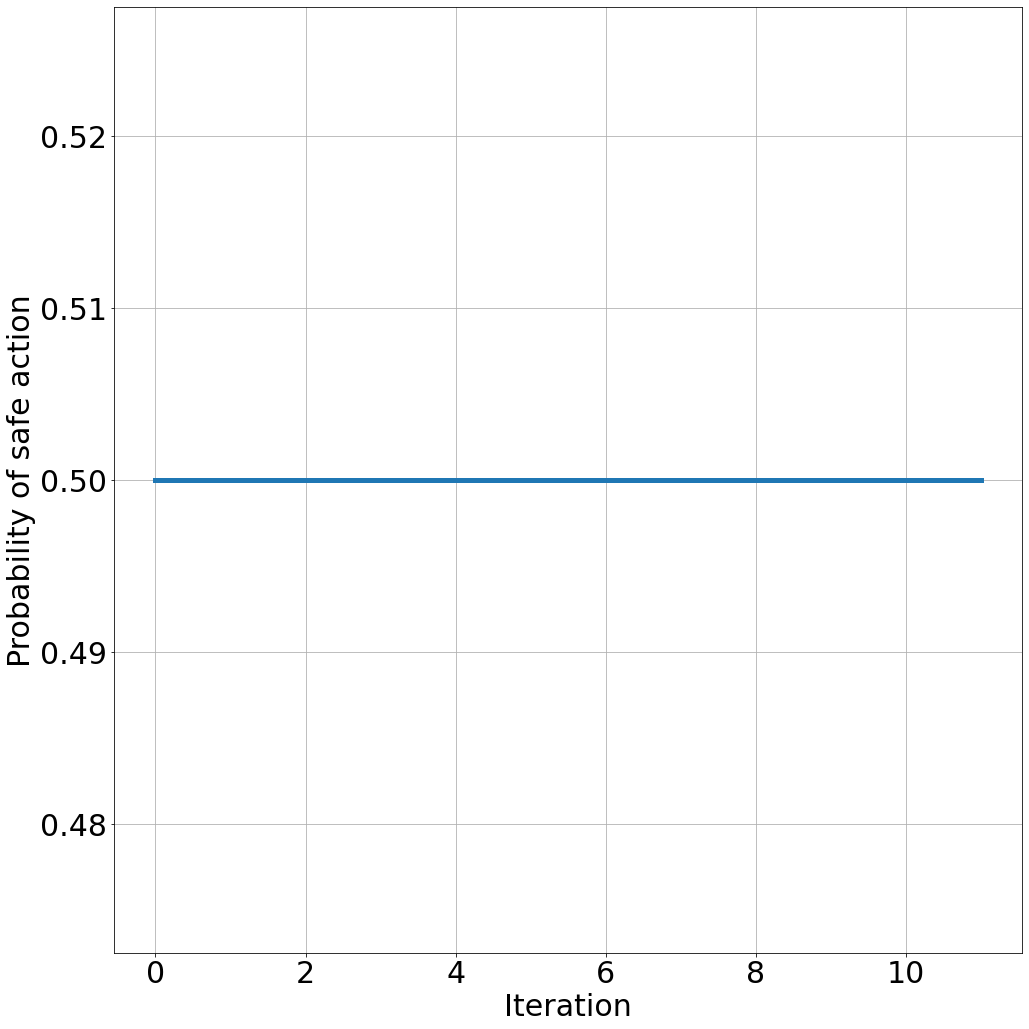

In [300]:
w,p = run(dc_rand, n_steps, 'random')

## Risky

In [301]:
dc_r = get_linear_decision_maker(torch.as_tensor([
    [-2]
], dtype=torch.float))

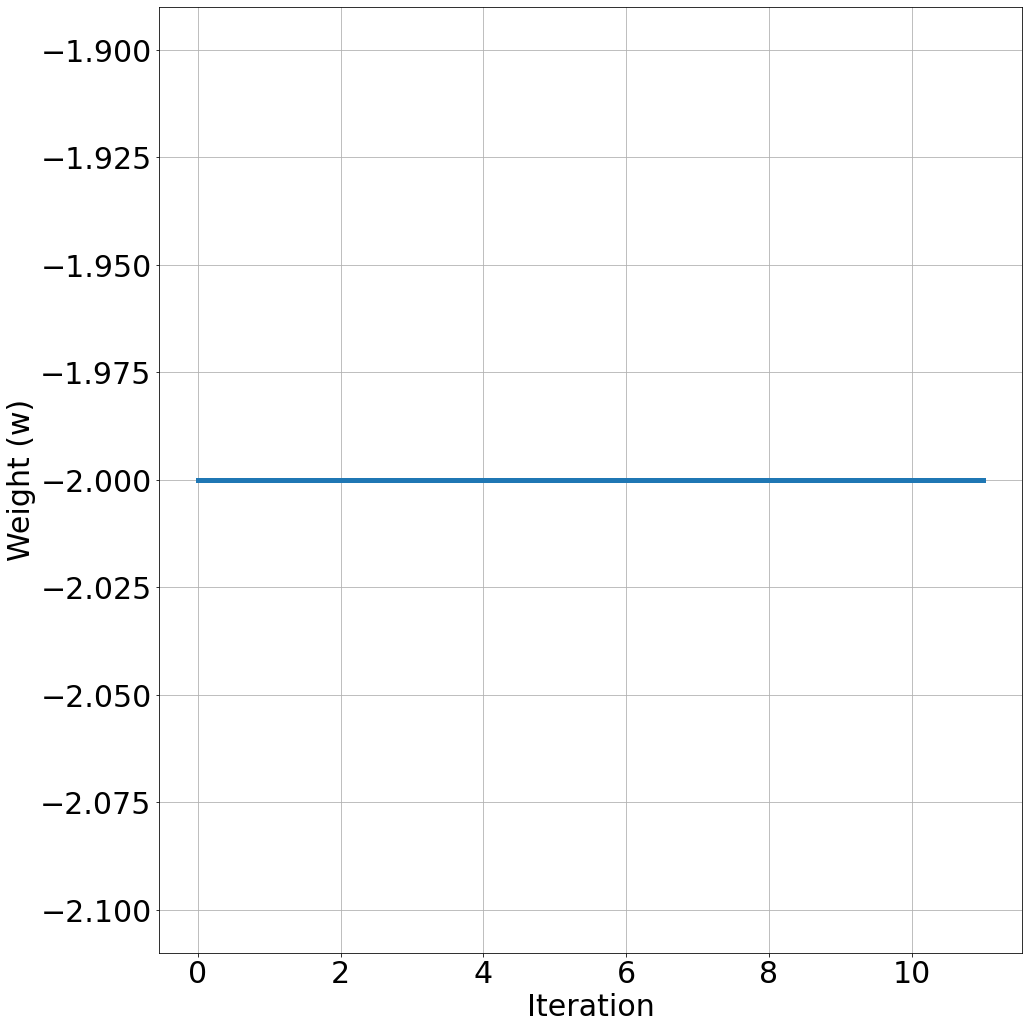

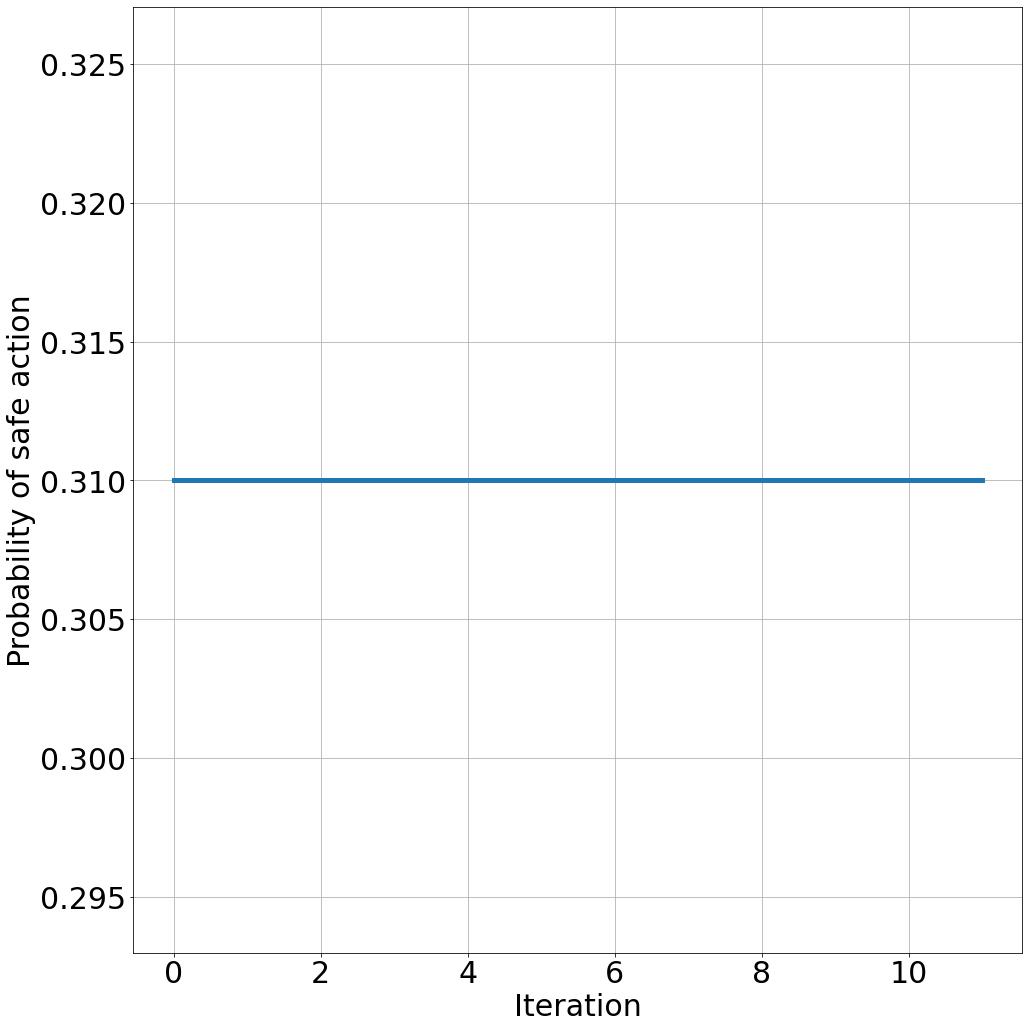

In [302]:
w,p = run(dc_r, n_steps, 'risky')

## Risky Aversion (Safe)

In [303]:
dc_nr = get_linear_decision_maker(torch.as_tensor([
    [2]
], dtype=torch.float))

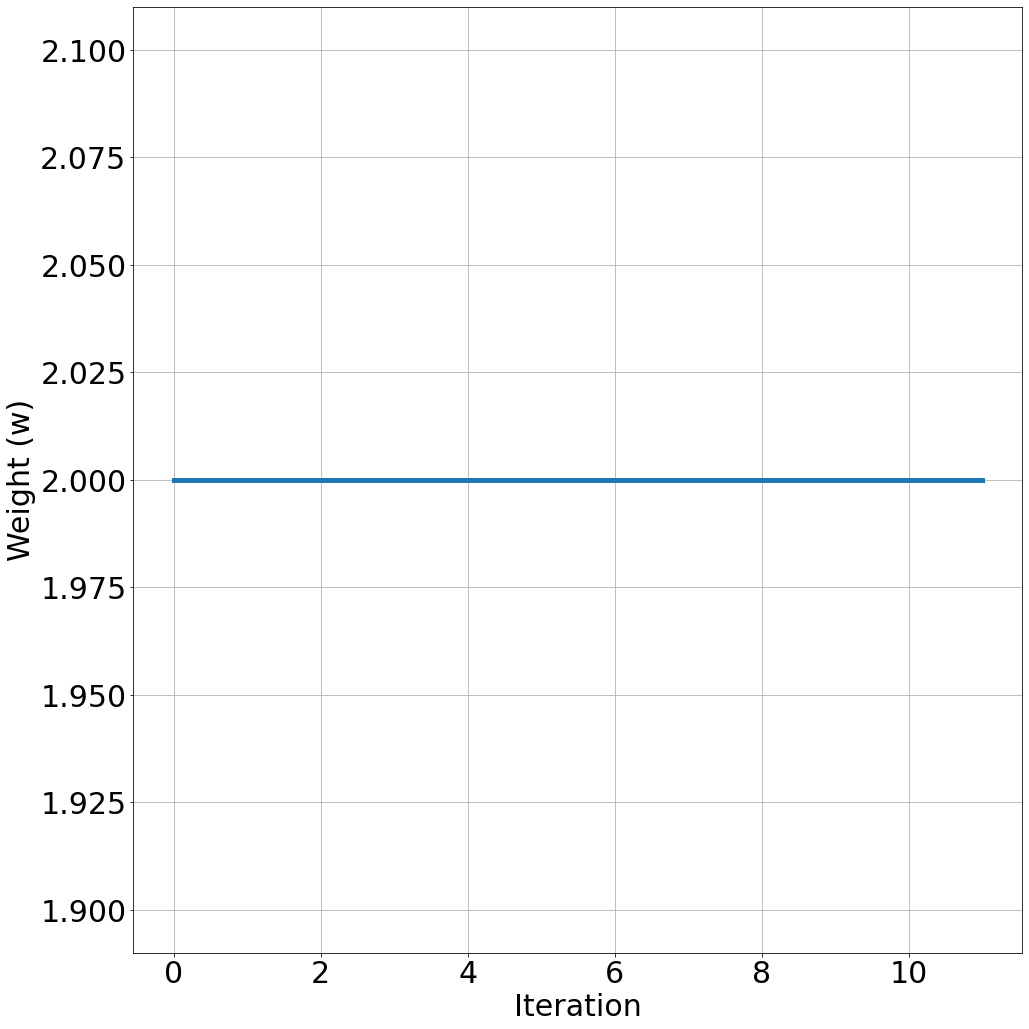

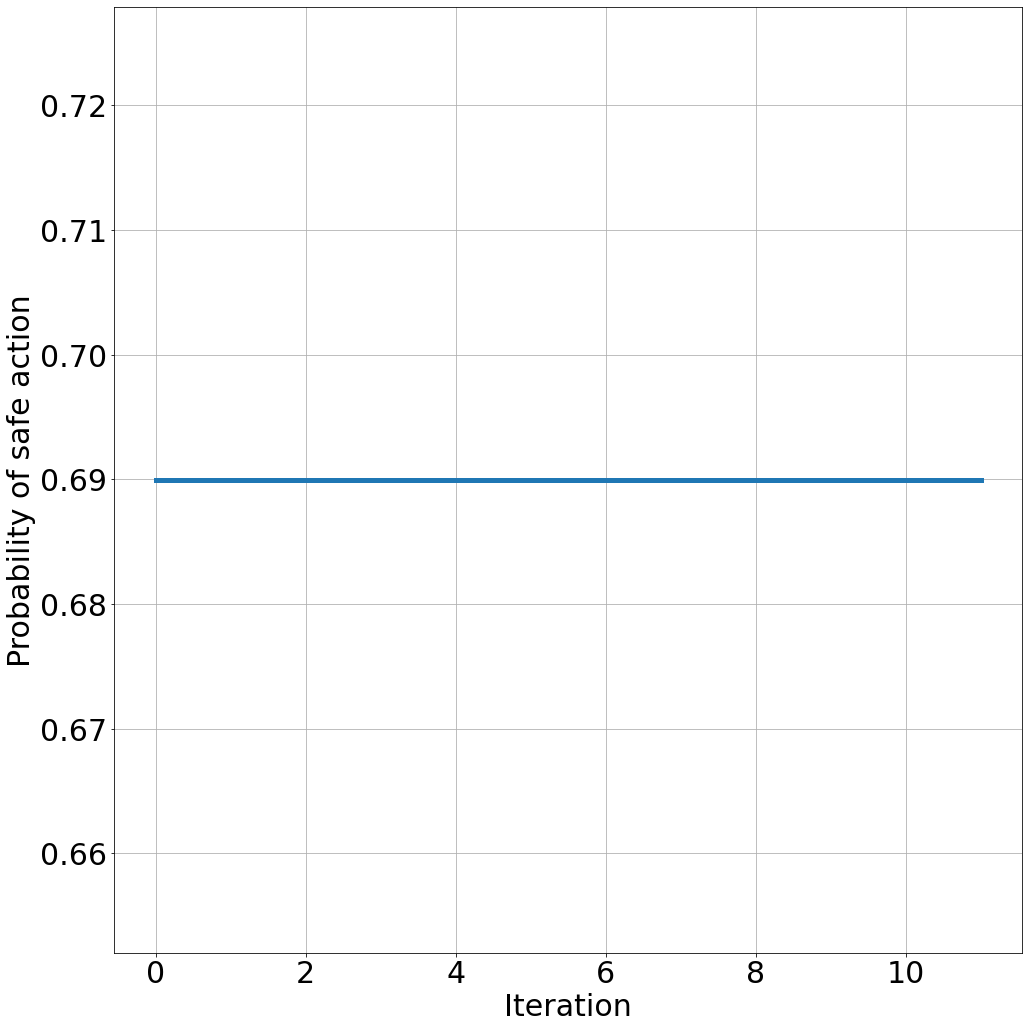

In [304]:
w,p = run(dc_nr, n_steps, 'safe')

## Safe NTM (but not too much) 

In [305]:
dc_rntm = get_linear_decision_maker(torch.as_tensor([
    [8],
    [-8],
    [-6],
], dtype=torch.float))

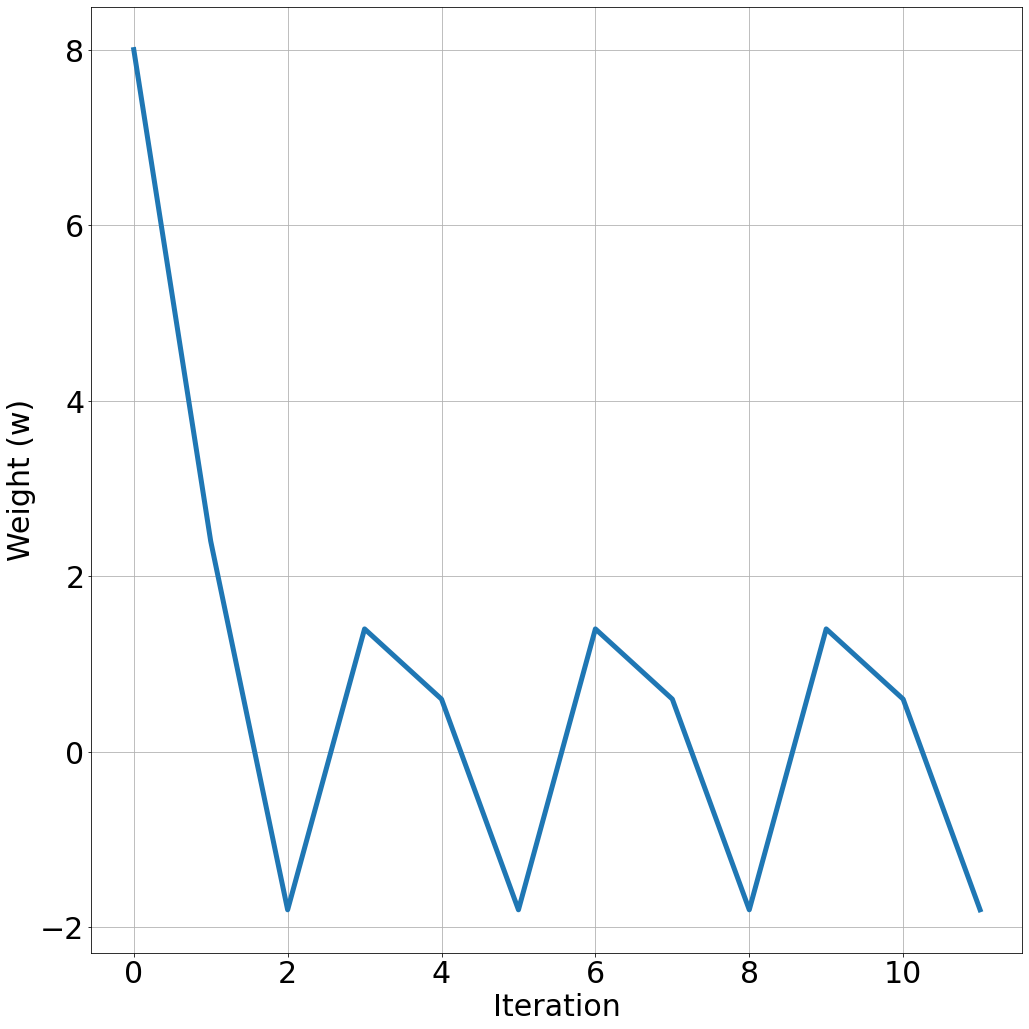

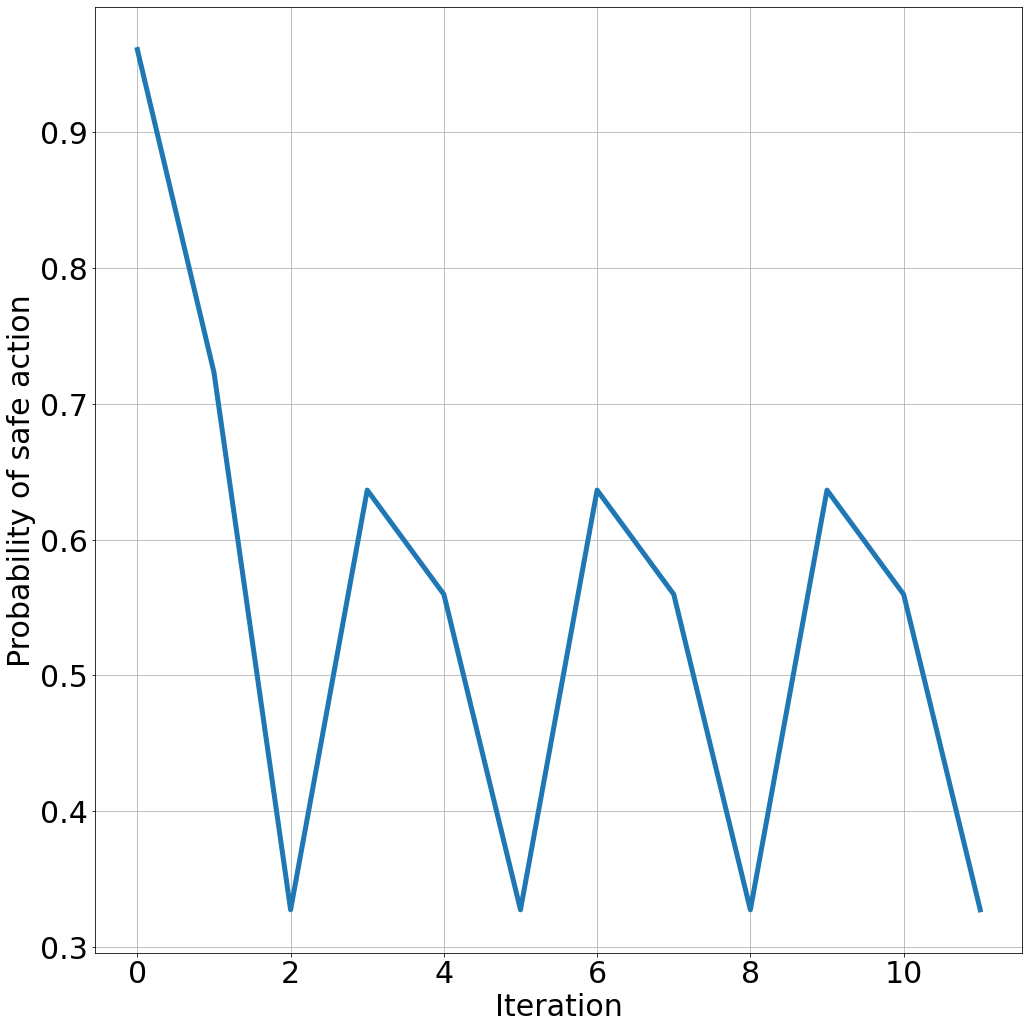

In [306]:
w,p = run(dc_rntm, n_steps, 'safe_ntm')

## Risky NTM (but not too much) 

In [307]:
dc_rntm = get_linear_decision_maker(torch.as_tensor([
    [-8],
    [8],
    [6],
], dtype=torch.float), inverse=True)

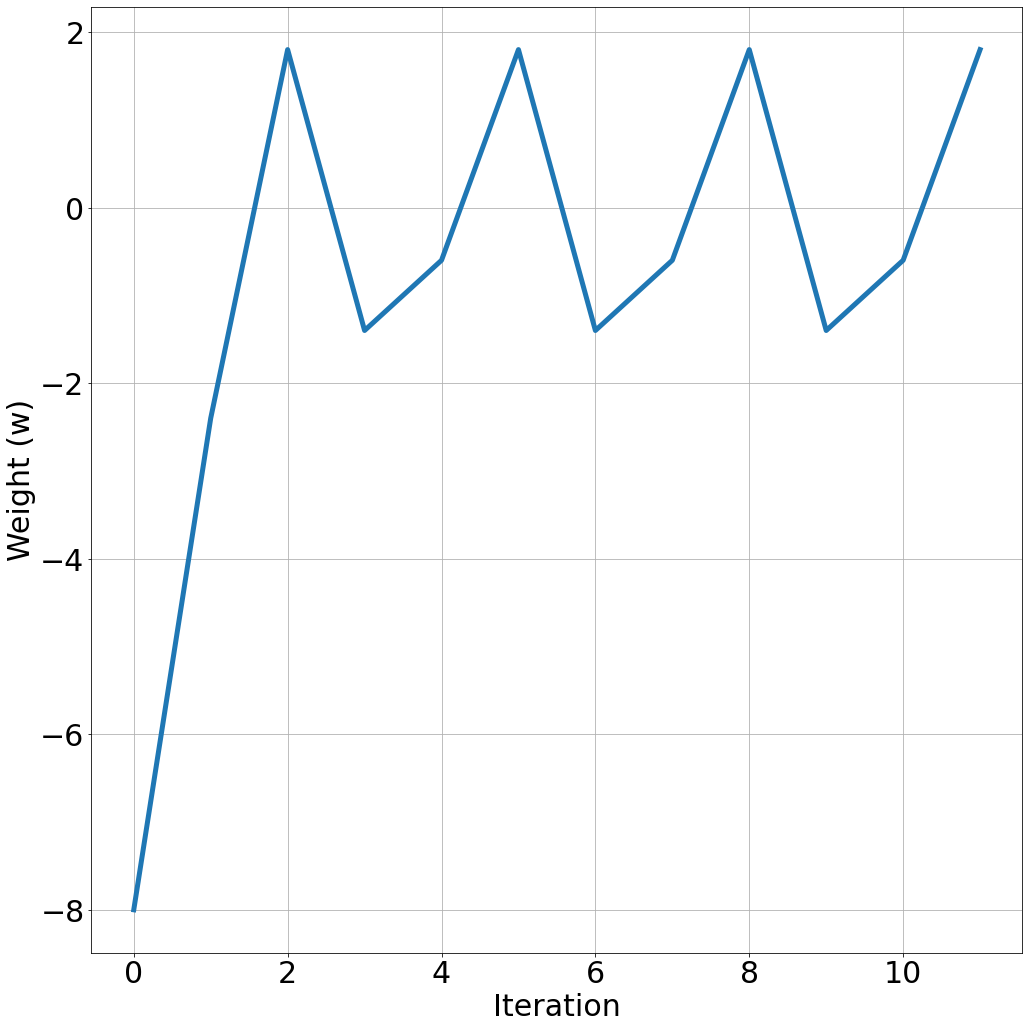

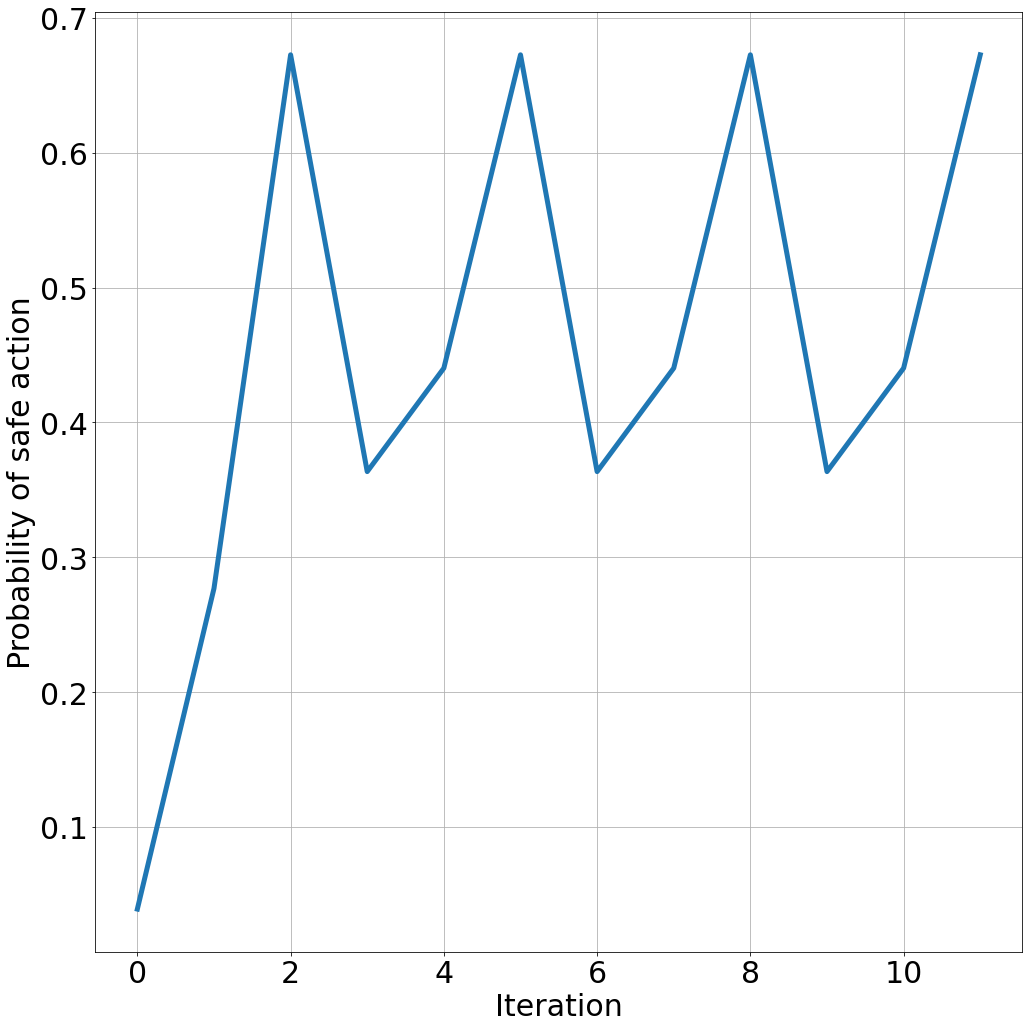

In [308]:
w,p = run(dc_rntm, n_steps, 'risky_ntm')

## WRONG Risky NTM (but not too much) 

In [309]:
dc_rntm = get_linear_decision_maker(torch.as_tensor([
    [-8],
    [8],
    [6],
], dtype=torch.float))

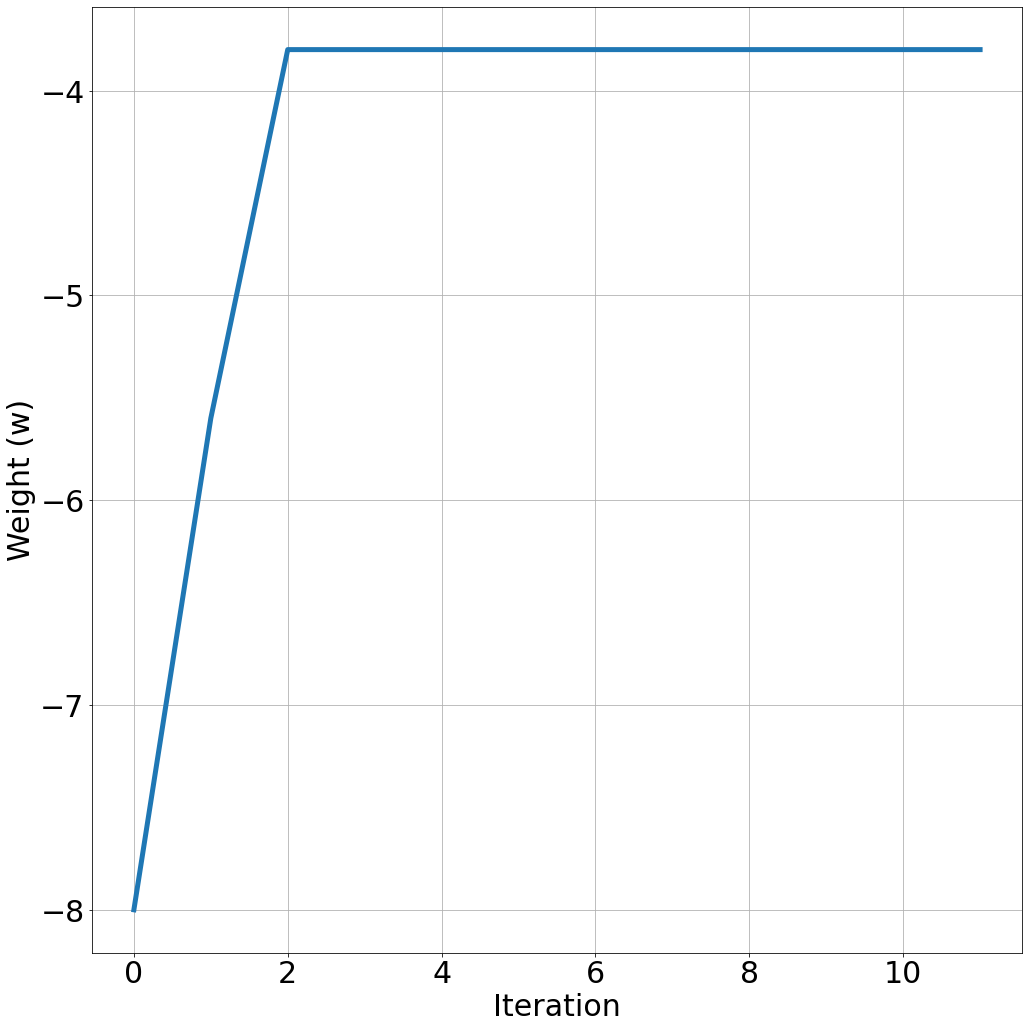

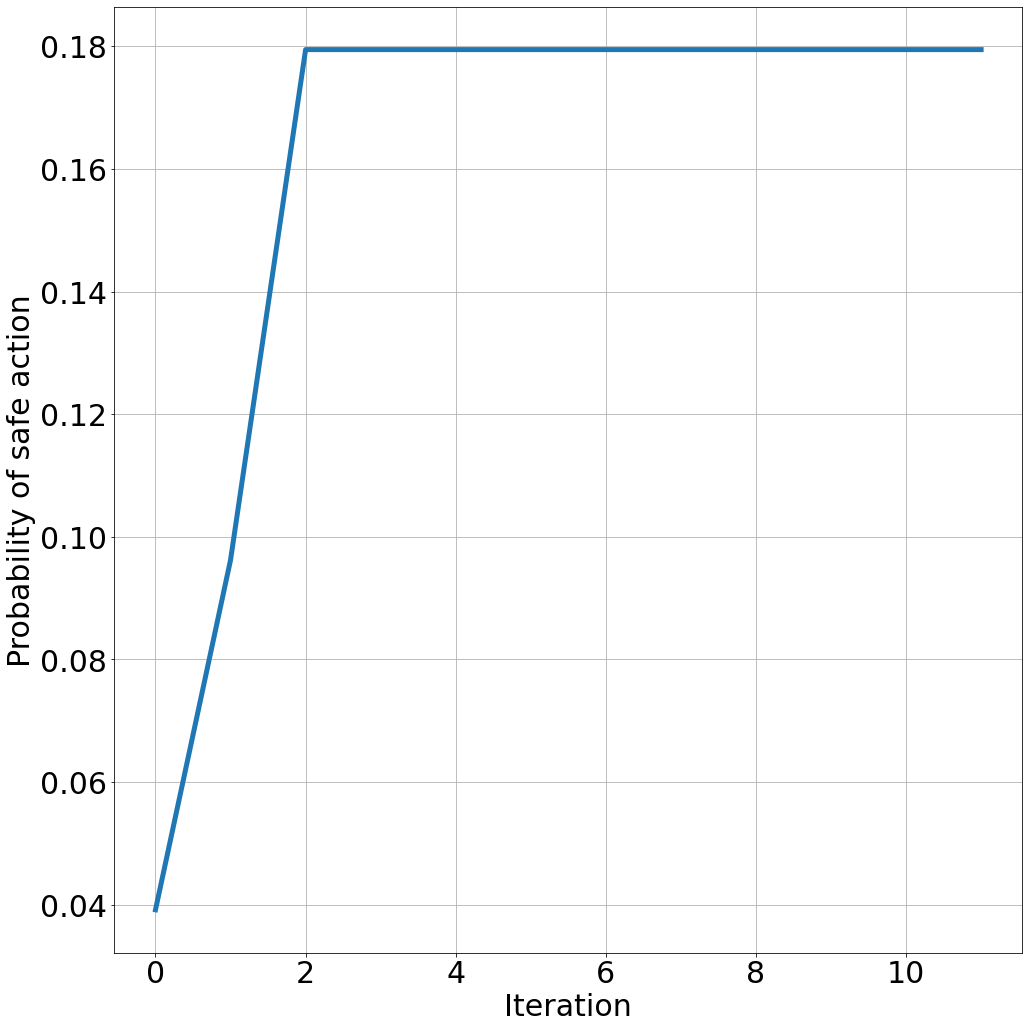

In [310]:
w,p = run(dc_rntm, n_steps, 'wrong_risky_ntm')